# Predicting Fuel Efficiency using Linear Regression

# Objective

The scenario:
- You are working at a car company. 
- Recently, customers have been complaining that the cars your company produces is not fuel-efficient enough. They want to spend less money on petrol, and are being attracted by your competitor's cars, which promise to have lower mile-per-gallon (mpg).
- You've been tasked by your manager to help speed up the design of more fuel-efficient cars.  Currently, design and production is slow because it requires lots of simulation and prototyping of different options.
- You've decided to try Machine Learning to more quickly come up with combinations of design properties (such as weight, horsepower, cylinders) that can result in better mpg.

# Dataset

While waiting for actual data from your company, you decide to explore a public dataset from the UC Irvine Machine Learning Repository. 

This will also help you experiment with building a predictive model, while recommending what data should be collected on the cars produced by your company.

This one happens to match your objective.  It's a "Regression", "Multi-variate (multiple variables)" dataset that has MPG with other properties.

https://archive.ics.uci.edu/ml/datasets/Auto+MPG

# Workflow

Day 1 - Basic Workflow

1. Import data through read_csv
2. Explore / transform / clean data
3. Shuffle data and split into training and test sets
4. Scale the training and test sets
5. Train linear regression and evaluate metrics
6. Train linear regression with Stochastic Gradient Descent and evaluate metrics
7. Get a prediction

Day 2 - Tuning

8. Plot learning curve to determine overfitting / underfitting
9. Cross validation and Hyperparameter tuning

## 1. Import data through read_csv

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# Run a command to list the directory you downloaded the data.

# Windows:
# !dir \tmp\auto-mpg

# MacOS
# !ls -al /tmp/auto-mpg

total 72
drwxrwxr-x  2 lisaong lisaong  4096 Jun 28 14:04 .
drwxrwxrwt 18 root    root    28672 Jun 28 14:04 ..
-rw-rw-r--  1 lisaong lisaong 30286 Jun 28 14:03 auto-mpg.data.txt
-rw-rw-r--  1 lisaong lisaong  1660 Jun 28 14:04 auto-mpg.names.txt


In [6]:
# Read data
df = pd.read_csv('/tmp/auto-mpg/auto-mpg.data.txt',
                 delim_whitespace=True, # the data uses whitespaces as separators instead of commas
                 na_values=['?', '<', 'dunno', '#NaN'],  # to handle '?' in the horsepower column
                 names=['mpg', 'cylinders', 'displacement', 'horsepower', # data has no column names
                       'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


## 2. Explore / transform / clean data

In [8]:
# Look at the mean / variance / range of each numerical column
# Note that pandas ignores the string column (car_name) because it's not numerical
df.describe()

# 2 observations:
# 1. As expected, horsepower is missing 6 values, so count is 392
# 2. The columns have quite different ranges (see mean, max), so we should scale them
#    so that each column has "equal" weighting in our linear model

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [25]:
# We drop the NaN rows, because there's no good way to interpolate or fillna with mean/median
# for horsepower of a car.  We'd be guessing randomly.
#
# Also, the number of rows dropped is small (6 rows), compared to the size of the dataset
# so we can "afford" to lose that data.
#
# inplace=True is okay here because we save some memory, and also because we
# don't need to keep the NaN rows around.

df.dropna(inplace=True)

### Plotting to Inspect Correlation

The next step in a regression model is to try to plot the datapoints, to see if there is any chance we have correlation.
- We want to avoid wasting time building a model if the data itself is random.

However, the problem is that we have a multivariate dataset.  So we need to figure out how to plot it.

#### Principal Component Analysis as a Dimensionality Reduction Tool for plotting

This is covered in slightly more detail in the "dimensionality.ipynb" notebook, but in summary:

- We have 7 input features (cylinders to origin), and 1 output feature.
- We can plot 7 different graphs (e.g. mpg vs. cylinders, mpg vs. displacement, mpg vs. horsepower, ...), or
- We can project the 7 input dimensions into 1 dimension using PCA, and plot a 2D graph, or
- We can project the 7 input dimensions into 2 dimensions using PCA, and plot a 3D graph, or
- Combinations of the above with different groups of features selected.

There's no right or wrong approach when exploring data.
- The quick and dirty way is to use PCA because you will have 1 graph that has all the features included.
- If the PCA graph does not show correlation, then try the more time-consuming ways of plotting (7 graphs, different combinations of features)

In [20]:
# Documentation: http://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

# Project in 2 dimensions
pca = PCA(n_components=2)

# Select columns, starting from cylinders and ending at origin
X = df.loc[:, 'cylinders':'origin']

# Reduce X to 2 dimensions. fit_transform is a combination of fit() + transform(), where
# fit() initializes the PCA model for 2 dimensions, and
# transform() performs the transformation
X_2d = pca.fit_transform(X)

# Compare the before and after shapes
print(X.shape)
X_2d.shape

(392, 7)


(392, 2)

<IPython.core.display.Javascript object>


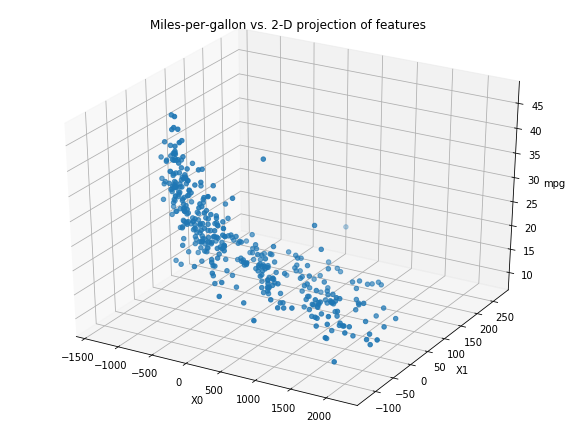

In [23]:
# Plotting: we're doing a 3-D interactive plot

# interactive plot
%matplotlib notebook

# set this for non-interactive (inline) plot. This is the default setting.
#%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

# Create a scatter plot on the 3D axes.
# x-axis = column 0 of X_2d, y-axis = column 1 of X_2d, z-axis: mpg
ax.scatter(X_2d[:, 0], X_2d[:, 1], df.mpg)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('mpg')
ax.set(title = 'Miles-per-gallon vs. 2-D projection of features')
plt.show()

### Here's how to plot the 1-D projection

In [12]:
# Project in 1 dimensions
pca = PCA(n_components=1)

# Select columns, starting from cylinders and ending at origin
X = df.loc[:, 'cylinders':'origin']

X_1d = pca.fit_transform(X)

# Compare the before and after shapes
print(X.shape)
X_1d.shape

(392, 7)


(392, 1)

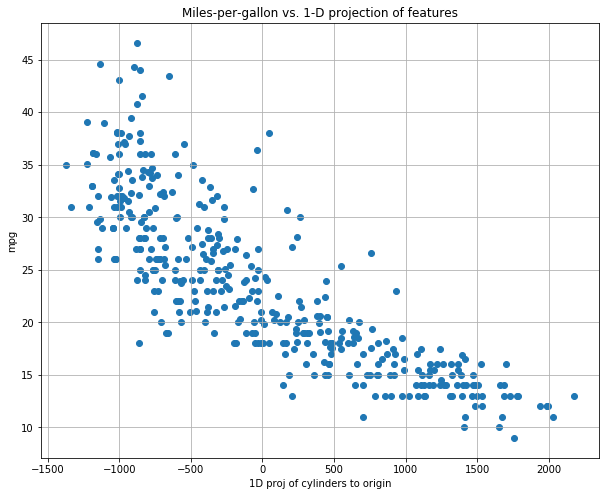

In [24]:
# switch back to non-interactive (this is just a matter of taste)
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 8))

# scatter plot of X_1d and mpg.
ax.scatter(X_1d, df.mpg)
ax.set(xlabel='1D proj of cylinders to origin', ylabel='mpg')
ax.set(title = 'Miles-per-gallon vs. 1-D projection of features')
ax.grid()

plt.show()

### Some correlation confirmed

Both 2-D and 1-D PCA projection plots show some inverse correlation to be drawn between the 7 features and mpg.  One can draw out a curve/band going from left to right.

We can go ahead and build our model to try to capture this correlation from the dataset.

### Which features are more important?

One thing that PCA doesn't tell you is which feature carries more weight (i.e. which feature actually influences mpg more).

This can be answered in several ways, but building a prediction model will also answer this question, based on the **sizes of the coefficients** after training.

We'll come back to this point after training the model.

## 3. Shuffle data and split into training and test sets

The next step is to shuffle the data, and reserve a portion of it for testing.

We don't want to train the entire dataset at once, because it can overfit to the data we already have, and won't "generalize well" for future data.

In other words, we want to set aside some test data to act like the "future data", so that we can validate that the prediction model can perform well with data that was NOT used during training.

Future data can be newer car models, or data that we collect at a later time.

In [27]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# This returns a view, so we can call it again without resulting in a copy of the data
X = df.loc[:, 'cylinders':'origin']
y = df.mpg

# A typical naming convention is to use upper case (e.g. X) for 2-d matrices, lower case (e.g. y) for 1-d vector
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.1, # reserve about 10% of the data for test
                                                    random_state=42) # set random state so we
                                                                     # get the same dataset each time
                                                                     # we run this code.
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(352, 7) (352,) (40, 7) (40,)


## 4. Scale the training and test sets

Next, we'll scale the training and test sets.

The standard practice is to:
- Use StandardScaler, which subtracts the mean and divides by the standard deviation for each column
- Fit the scaler to only the train data. This computes the mean and standard deviation for each column in the training data, and stores it in the scaler.
- Transform (i.e. scale) both the train and test data. This step performs the actual scaling.
- Use separate scalers for X and y, to keep things separate. In some datasets, it's not necessary to scale y, because y is within a small range. So a different scaler for X and y is more consistent.

### Why fit the scaler to only the train data?
The test data acts as the "future" data that your model has not yet seen during training.  If you scale the dataset with all the rows of X (including both train and the test data), you are not sufficiently treating the test data as separate. 

In other words, tt won't be a fair evaluation test of your model. If your dataset is too small, you can break this rule, but be aware that your model may not generalize as well.

Your model will have the mean and std deviation that includes the test data.  So, for a fairer test, you should only initialize the scaler with the training data.

In [38]:
# Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# 1. initialize the scaler
X_scaler.fit(train_X)

# 2. scale both X datasets
train_X_scaled = X_scaler.transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

# Repeat for y
# 1. initialize the scaler
y_scaler.fit(train_y.values.reshape(-1, 1))

# 2. scale both y series
train_y_scaled = y_scaler.transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y.values.reshape(-1, 1))

print(train_X_scaled)

[[ 1.475576    1.06253872  0.65147856 ... -0.53067157 -1.10596998
  -0.69730691]
 [-0.87200706 -1.01574043 -0.78161143 ...  0.01509117 -0.5572717
   0.54864249]
 [-0.87200706 -0.87208058 -0.80766761 ... -0.0576772   1.63752144
   0.54864249]
 ...
 [-0.87200706 -0.43152371 -0.52104961 ...  0.77915899  0.54012487
  -0.69730691]
 [-0.87200706 -0.93912185 -1.04217324 ...  1.90706864  1.3631723
  -0.69730691]
 [ 1.475576    1.95322978  1.1726022  ... -0.53067157 -0.83162084
  -0.69730691]]


In [66]:
# Example of what scaling does: subtract mean, divide by std deviation
(train_X.iloc[0][0] - X_scaler.mean_[0]) / np.sqrt(X_scaler.var_[0])

# The reason why you see numbers higher than 1 or lower than -1, is because
# StandardScaler scales by standard deviation,
# and not the mean-normalized range ((max - mean) - (min - mean))

1.4755759969423745

##  5. Train linear regression and Evaluate Metrics

This uses linear algebra to compute the weights.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

pred_scaled = lin.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled)) # lower is better
print('R2:', r2_score(test_y_scaled, pred_scaled)) # higher and close to 1 is better

MSE: 0.14165393059559755
R2: 0.8550071364633915


In [86]:
print('coefficients (w1, ..., w7)', lin.coef_, 'intercept (w0)', lin.intercept_)

coefficients (w1, ..., w7) [[-0.09003642  0.21619638 -0.0778038  -0.68072931  0.02024822  0.35242396
   0.15030936]] intercept (w0) [2.6691474e-16]


### Interpretation of the Weights
The coefficients + intercept also indicate the relative feature weights.

This is why we call them "weights".

In [107]:
# This is just to print stuff
coefficients = lin.coef_ + lin.intercept_

# Probably can do a loop, but this code is easier to read
print('mpg_pred_scaled = (%.2f * scaled_cylinders) + (%.2f * scaled_displacement) + (%.2f * horsepower)\n' \
      '                + (%.2f * scaled_weight) + (%.2f * scaled_acceleration) + (%.2f * model_year)\n' \
      '                + (%.2f * scaled_origin)' % tuple(coefficients.flatten()))

mpg_pred_scaled = (-0.09 * scaled_cylinders) + (0.22 * scaled_displacement) + (-0.08 * horsepower)
                + (-0.68 * scaled_weight) + (0.02 * scaled_acceleration) + (0.35 * model_year)
                + (0.15 * scaled_origin)


According to the Linear Regression model based on the data that we have:
- The most important features determining MPG are the weight and model year (seems reasonable)
- The least important features determining are the acceleration (surprising?) and the horsepower (also surprising?)

The weights also indicate the relationship (negative or positive) with MPG.

## 6. Train linear regression with Stochastic Gradient Descent

In [78]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000) # sklearn forces us to set max_iter
sgd.fit(train_X_scaled, train_y_scaled.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_sgd = sgd.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_sgd))
print('R2:', r2_score(test_y_scaled, pred_scaled_sgd))

-- Epoch 1
Norm: 0.44, NNZs: 7, Bias: -0.011245, T: 352, Avg. loss: 0.142608
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.48, NNZs: 7, Bias: -0.001938, T: 704, Avg. loss: 0.106629
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.48, NNZs: 7, Bias: 0.001958, T: 1056, Avg. loss: 0.103190
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.50, NNZs: 7, Bias: -0.000506, T: 1408, Avg. loss: 0.101638
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.51, NNZs: 7, Bias: -0.002079, T: 1760, Avg. loss: 0.100728
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.53, NNZs: 7, Bias: -0.001030, T: 2112, Avg. loss: 0.099880
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 7, Bias: 0.000169, T: 2464, Avg. loss: 0.099355
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.53, NNZs: 7, Bias: -0.000194, T: 2816, Avg. loss: 0.098869
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.54, NNZs: 7, Bias: 0.001289, T: 3168, Avg. loss: 0.098318
Total training time: 0.

Other Experiments with SGD:
1. Learning rate too high
2. Train longer

In [79]:
# Learning rate too high
sgd_bad = SGDRegressor(verbose=True,
                   tol=1e-4, # stop training when |new_loss - loss| < 1e-4
                   max_iter = 1000,
                   learning_rate='constant', # keep constant learning rate (instead of decreasing with iterations)
                   eta0 = 10) # learning rate
sgd_bad.fit(train_X_scaled, train_y_scaled.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_bad = sgd_bad.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_bad)) # really high
print('R2:', r2_score(test_y_scaled, pred_scaled_bad)) # really low (and negative)

-- Epoch 1
Norm: 41989332894699.71, NNZs: 7, Bias: 17069023579050.406250, T: 352, Avg. loss: 1291467564149795141376278528.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32523542208346.44, NNZs: 7, Bias: 420648617196.007812, T: 704, Avg. loss: 1395102029048882272680280064.000000
Total training time: 0.00 seconds.
Convergence after 2 epochs took 0.00 seconds
MSE: 2.9998065116991e+27
R2: -3.070515123429513e+27


In [83]:
# Train for a longer time (see the loss bouncing around at the minimum point)
#
# Note that if you try tol=1e-10, you may get a slightly better model. The only explanation
# I can think of is the stochastic nature (randomly pick a sample each iteration)

sgd_more = SGDRegressor(verbose=True,
                        tol=1e-8, # stop training when |new_loss - loss| < 1e-8
                        max_iter = 1000) # learning rate
sgd_more.fit(train_X_scaled, train_y_scaled.ravel()) # ravel converts 2-D array to 1-D vector

pred_scaled_more = sgd_more.predict(test_X_scaled)

print('MSE:', mean_squared_error(test_y_scaled, pred_scaled_more))
print('R2:', r2_score(test_y_scaled, pred_scaled_more))

-- Epoch 1
Norm: 0.43, NNZs: 7, Bias: -0.017729, T: 352, Avg. loss: 0.137199
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 7, Bias: -0.009130, T: 704, Avg. loss: 0.107682
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.49, NNZs: 7, Bias: -0.004344, T: 1056, Avg. loss: 0.103571
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.50, NNZs: 7, Bias: -0.002352, T: 1408, Avg. loss: 0.101690
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.52, NNZs: 7, Bias: -0.002708, T: 1760, Avg. loss: 0.100563
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.53, NNZs: 7, Bias: -0.001557, T: 2112, Avg. loss: 0.099704
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.53, NNZs: 7, Bias: -0.001049, T: 2464, Avg. loss: 0.099265
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.54, NNZs: 7, Bias: 0.001939, T: 2816, Avg. loss: 0.098513
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.54, NNZs: 7, Bias: 0.001586, T: 3168, Avg. loss: 0.098214
Total training time: 0

## 7. Get a prediction

This is where we see how the model would perform in deployment.

Important points:
- We have to perform same data preprocessing during deployment (same that was done for training).
- We have to perform same postprocessing during deployment (same that was done for training).

Seems like an obvious thing, but it's a common source of poor model deployment performance compared to training.

In [114]:
# Take the first 3 samples from the test set

test_input = test_X[:3]
test_truth = test_y[:3] # just for comparison. Typically not available in deployment
                        # (which is why we want to predict it)

# Scale test_input
test_input_scaled = X_scaler.transform(test_input)

# Get predictions for both models side by side
lin_test_pred_scaled = lin.predict(test_input_scaled)
sgd_test_pred_scaled = sgd.predict(test_input_scaled)

# Unscale the result
lin_test_pred = y_scaler.inverse_transform(lin_test_pred_scaled)
sgd_test_pred = y_scaler.inverse_transform(sgd_test_pred_scaled)

# Print results
print('Some sample predictions:')
for truth, lin_pred, sgd_pred in zip(test_truth, lin_test_pred, sgd_test_pred):
    print('Linear Regression: %.3f mpg, SGD Linear Regression: %.3f mpg, Actual: %.3f mpg' % (lin_pred, sgd_pred, truth))

Some sample predictions:
Linear Regression: 25.743 mpg, SGD Linear Regression: 25.699 mpg, Actual: 26.000 mpg
Linear Regression: 25.995 mpg, SGD Linear Regression: 26.624 mpg, Actual: 21.600 mpg
Linear Regression: 34.153 mpg, SGD Linear Regression: 33.222 mpg, Actual: 36.100 mpg


## 8. Plot learning curve to determine overfitting / underfitting

To be continued...

## 9. Cross Validation and Hyper-parameter tuning

To be continued...